# EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('csv_files/book_ratings.csv')

In [3]:
genre_df = pd.read_csv('csv_files/genre_5000.csv' )
genre_df = genre_df.drop(columns='Unnamed: 0')

In [4]:
df.shape

(20853, 3)

In [5]:
df.head()

,user,book,rating
0,/review/list/4166936-cora-tea-party-princess,/book/show/18332131-a-dark-and-twisted-tide,3.94
1,/review/list/4166936-cora-tea-party-princess,/book/show/18522304-silencing-sapphire,4.16
2,/review/list/4166936-cora-tea-party-princess,/book/show/18522351-the-colour-of-magic,3.99
3,/review/list/4166936-cora-tea-party-princess,/book/show/18525289-gibside,5.00
4,/review/list/4166936-cora-tea-party-princess,/book/show/18657686-war-girls,3.81


In [6]:
genre_df.head()

,book,genre
0,/book/show/26047357-the-cardinal-s-sin,Mystery
1,/book/show/36863463-tall-chimneys,Historical
2,/book/show/26013318-craved,Dark
3,/book/show/23007718-oliver-and-jumpy-stories-1...,Childrens
4,/book/show/31200537-blind-side,Thriller


In [7]:
#df1.hist(column='human_den',by='region', ax=axes)

# set title and axis labels
# plt.suptitle('Your Title Here', x=0.5, y=1.05, ha='center', fontsize='xx-large')
# fig.text(0.5, 0.04, 'common X', ha='center')
# fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')

/Users/roberthillery/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


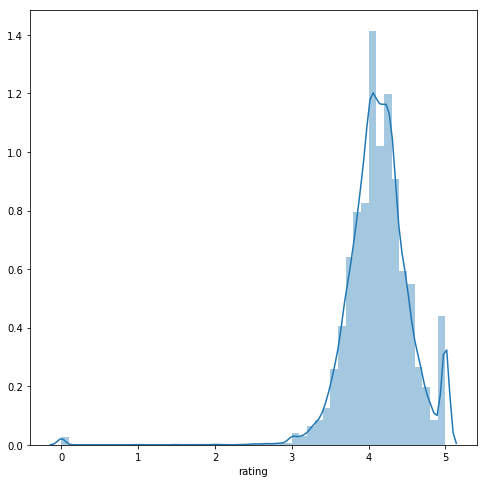

In [8]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.distplot(df.rating, )

In [54]:
genre_df.iloc[:,1]

0                 Mystery
1              Historical
2                    Dark
3               Childrens
4                Thriller
5                 Fiction
6                 Romance
7                     NaN
8                 Fantasy
9       Christian Fiction
10         Sequential Art
11                Fantasy
12             Nonfiction
13            Young Adult
14             Paranormal
15                Romance
16             Nonfiction
17               Language
18                Romance
19                    NaN
20                    NaN
21         Sequential Art
22                Romance
23                Fiction
24                 Horror
25            Young Adult
26            Young Adult
27                Fantasy
28             Historical
29                Romance
              ...        
4970              Mystery
4971           Historical
4972              Fiction
4973               Horror
4974                  NaN
4975          Young Adult
4976       Sequential Art
4977        

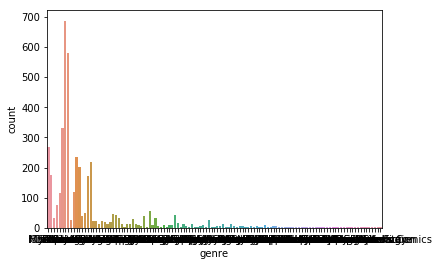

In [55]:
sns.countplot(genre_df.iloc[:,1])

Text(0.5,0.98,'Number of Ratings')

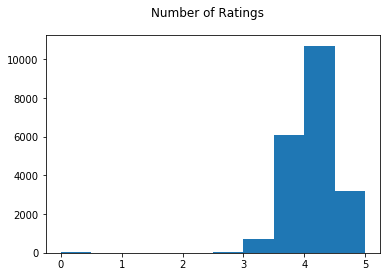

In [9]:
df['rating'].hist(grid=False)
plt.suptitle('Number of Ratings')

In [10]:
df.nunique()

user       1448
book      17536
rating      235
dtype: int64

In [59]:
# amount of genres for the books
genre_df.groupby('genre').count().shape

(119, 1)

In [70]:
genre_count_df = genre_df.groupby('genre').count().sort_values('book', ascending=False)[:55]


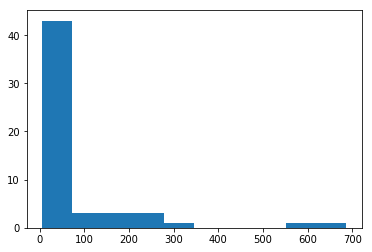

In [77]:
genre_count_df['book'].hist(grid=False, x)

In [11]:

top_rated = df.groupby('book').count().sort_values('user', ascending=False)[:40] #['bookRating'].count().reset_index().sort_values('bookRating', ascending=False)[:10]

top_rated = top_rated.drop(columns='user')

# graph this
top_rated.head(10)

,rating
book,
/book/show/2767052-the-hunger-games,125
/book/show/6148028-catching-fire,40
/book/show/13335037-divergent,39
/book/show/11870085-the-fault-in-our-stars,37
/book/show/22557272-the-girl-on-the-train,36
/book/show/17899948-rebecca,32
/book/show/7260188-mockingjay,31
/book/show/12232938-the-lovely-bones,31
/book/show/17470674-fahrenheit-451,29


In [79]:
# get only the books

# top_rated['rating'].hist(grid=False)
sns.(genre_count_df)

TypeError: 'module' object is not callable

In [13]:
# maybe cluster by genre?
print('Check the number of books and get the average rating. \nThere are ' + str(len(df.groupby('book')['rating'].mean()))
         + ' books')
mean_rating_df = pd.DataFrame(df.groupby('book')['rating'].mean())

Check the number of books and get the average rating. 
There are 17536 books


In [14]:
type(mean_rating_df)
mean_rating_df.columns

Index(['rating'], dtype='object')

In [15]:
mean_rating_df = mean_rating_df.reset_index() 

In [16]:
mean_rating_df.head()

,book,rating
0,/book/show/10000269-prey,3.74
1,/book/show/10000647-the-opposite-of-dark,3.77
2,/book/show/10024937-iron-house,4.09
3,/book/show/10025305-clockwork-prince,4.45
4,/book/show/10030355-christmas-in-killarney,3.84


In [18]:
#mean_rating_df['title'] = mean_rating_df['book'].apply(lambda x: x[20:].split('-'))
book_titles = []
for x in mean_rating_df['book']:
    new_index = x.find('-')
    book_titles.append(x[new_index:])
book_titles

['-prey',
 '-the-opposite-of-dark',
 '-iron-house',
 '-clockwork-prince',
 '-christmas-in-killarney',
 '-the-emperor-s-edge',
 '-the-language-of-flowers',
 '-noble-chaos',
 '-the-hanging-shed',
 '-stealing-rembrandts',
 '-the-kiss-of-a-stranger',
 '-clockwork-prince',
 '4',
 '-the-crystal-key',
 '-fool-moon',
 '-the-way-of-kings',
 '-dog-sayings-wit-wisdom-from-man-s-best-friend',
 '-the-magician-king',
 '-coal-gasification-and-its-applications',
 '-david-copperfield',
 '-i-am-here-omnibus-vol-02',
 '-snake-skin',
 '-from-the-big-house-to-your-house',
 '-the-complete-stories-of-sherlock-holmes-volume-1',
 '-divergent',
 '-mary-poppins',
 '-valley-of-death-zombie-trailer-park',
 '-silver-tongued-devil',
 '-the-day-aberystwyth-stood-still',
 '-chanakya-s-chant',
 '-living-in-the-now',
 '-peter',
 '-the-devil-all-the-time',
 '-pure',
 '-the-commander-and-the-den-asaan-rautu',
 '-violence-against-prisoners-of-war-in-the-first-world-war',
 '-the-evolutionary-void',
 '-the-inventor-s-secret'

In [133]:
#df.groupby('book')['rating'].count().sort_values(ascending=False).head(30)

In [19]:
test_lambda3 = []
for book in thing:
    cap = book.split('-') 
    titles = ' '.join(cap)[1:]
    final_title = titles.capitalize()#[x.capitalize() for x in titles]
    test_lambda3.append(final_title)

In [20]:
test_lambda4 = []
for book in thing:
    cap = book.split('-') 
    titles = ' '.join(cap)[1:]
    final_title = titles.title()#[x.capitalize() for x in titles]
    test_lambda4.append(final_title)

In [21]:
test_lambda4

['Prey',
 'The Opposite Of Dark',
 'Iron House',
 'Clockwork Prince',
 'Christmas In Killarney',
 'The Emperor S Edge',
 'The Language Of Flowers',
 'Noble Chaos',
 'The Hanging Shed',
 'Stealing Rembrandts',
 'The Kiss Of A Stranger',
 'Clockwork Prince',
 '',
 'The Crystal Key',
 'Fool Moon',
 'The Way Of Kings',
 'Dog Sayings Wit Wisdom From Man S Best Friend',
 'The Magician King',
 'Coal Gasification And Its Applications',
 'David Copperfield',
 'I Am Here Omnibus Vol 02',
 'Snake Skin',
 'From The Big House To Your House',
 'The Complete Stories Of Sherlock Holmes Volume 1',
 'Divergent',
 'Mary Poppins',
 'Valley Of Death Zombie Trailer Park',
 'Silver Tongued Devil',
 'The Day Aberystwyth Stood Still',
 'Chanakya S Chant',
 'Living In The Now',
 'Peter',
 'The Devil All The Time',
 'Pure',
 'The Commander And The Den Asaan Rautu',
 'Violence Against Prisoners Of War In The First World War',
 'The Evolutionary Void',
 'The Inventor S Secret',
 'The Lean Startup',
 'Fullmetal Alc

In [46]:
[x for x in test_lambda4]

SyntaxError: can't assign to function call (<ipython-input-46-9bde255dbf06>, line 1)

In [22]:
mean_rating_df['title'] = test_lambda4

In [24]:
mean_rating_df.head()

,book,rating,title
0,/book/show/10000269-prey,3.74,Prey
1,/book/show/10000647-the-opposite-of-dark,3.77,The Opposite Of Dark
2,/book/show/10024937-iron-house,4.09,Iron House
3,/book/show/10025305-clockwork-prince,4.45,Clockwork Prince
4,/book/show/10030355-christmas-in-killarney,3.84,Christmas In Killarney


In [29]:
# find a rating by the name...
number = mean_rating_df[mean_rating_df['title'].str.match("Clockwork Prince")]['rating']

In [30]:
number

3        4.45
11       4.45
1756     4.45
2713     4.59
3390     4.59
16050    4.59
Name: rating, dtype: float64

In [41]:
#get ratings for the hungry games df.loc[[3, 11, 1756, 2713, 3390,16050]]
hg_number = mean_rating_df[mean_rating_df['title'].str.match('The Hungry Games')]['rating']

In [42]:
hg_number

Series([], Name: rating, dtype: float64)

In [34]:
mean_rating_df.shape

(17536, 3)

In [192]:
subset = mean_rating_df[['title', 'rating']]

In [193]:
tuples = [tuple(x) for x in subset.values]

In [ ]:
len(tuples)

In [ ]:
tuples[0]

In [ ]:
import numpy as np

In [234]:

# thing = []
# for x in mean_rating_df['book']:
#     new_index = x.find('-')
#     thing.append(x[new_index:])
# thing
answer = []
for x in tuples:
    new_index = (x[0].find('Sons Of Encouragement') == 0)
    answer.append(new_index)
    #np.where(states)[0]
answer

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [235]:
answer[48]

False

In [241]:
tuples[np.where(answer)[0][0]][1]

4.37

In [196]:
# with open('webapp/model/ratings_tuple.pkl', 'wb') as file:
#     pickle.dump(tuples, file)

In [170]:
import pickle

In [171]:
# # pickle the titles with user facing titles and mean score
# with open('webapp/model/book_ratings_mean.pkl', 'wb') as file:
#     pickle.dump(mean_rating_df, file)

In [243]:
mean_rating_df.to_csv('webapp/model/book_ratings_mean.csv', encoding='utf-8', index=True)

In [243]:
mean_rating_df.to_csv('webapp/model/book_ratings_mean.csv', encoding='utf-8', index=True)

In [38]:
book_ratings_mean_count = pd.DataFrame(df.groupby('book')['rating'].mean())

In [ ]:
book_ratings_mean

In [42]:
book_ratings_mean_count['ratings_amount'] = pd.DataFrame(df.groupby('book')['rating'].count())

In [58]:
book_ratings_mean_count['ratings_amount'].sort_values()

125

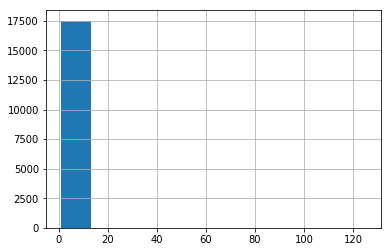

In [50]:
book_ratings_mean_count['ratings_amount'].hist()

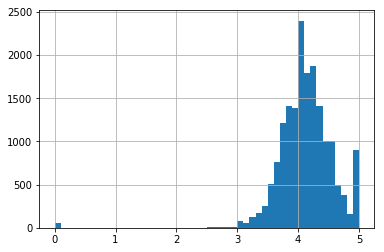

In [53]:
# histogram of average ratings
book_ratings_mean_count['rating'].hist(bins=50)

/Users/roberthillery/anaconda3/envs/books/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


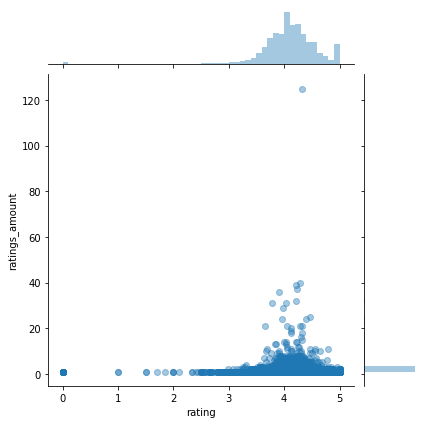

In [54]:
sns.jointplot(x='rating', y='ratings_amount', data=book_ratings_mean_count, alpha=.4)

In [59]:
# drop hunger games, as an upper outlier
book_ratings_mean_count_no_hg = book_ratings_mean_count.drop('/book/show/2767052-the-hunger-games')

In [60]:
 book_ratings_mean_count.shape

(17536, 2)

In [61]:
book_ratings_mean_count_no_hg.shape

(17535, 2)

/Users/roberthillery/anaconda3/envs/books/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


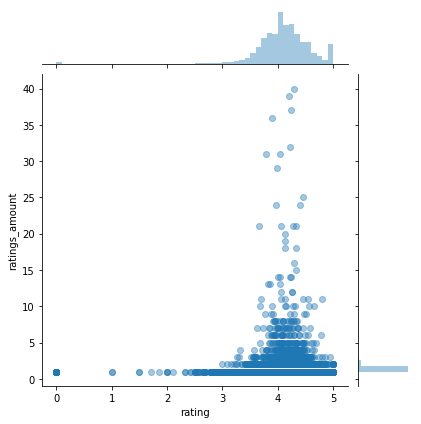

In [62]:
sns.jointplot(x='rating', y='ratings_amount', data=book_ratings_mean_count_no_hg, alpha=.4)

In [64]:
user_book_rating = df.pivot_table(index='user', columns='book', values='rating')

In [66]:
user_book_rating.shape

(1448, 17536)

In [80]:
user_book_rating.head()

book,/book/show/10000269-prey,/book/show/10000647-the-opposite-of-dark,/book/show/10024937-iron-house,/book/show/10025305-clockwork-prince,/book/show/10030355-christmas-in-killarney,/book/show/10031259-the-emperor-s-edge,/book/show/10032672-the-language-of-flowers,/book/show/10038738-noble-chaos,/book/show/10041211-the-hanging-shed,/book/show/10042118-stealing-rembrandts,...,/book/show/9972053-if-you-ask-me,/book/show/9975779-portrait-of-a-spy,/book/show/9975786-in-spite-of-everything,/book/show/9976857-les-mis-rables,/book/show/9978035-sons-of-encouragement,/book/show/9984012-the-wonderful-wizard-of-oz,/book/show/9992246-eating-smoke,/book/show/9995135-the-darkest-seduction,/book/show/9997906-busy-monsters,/book/show/9999107-the-american-heiress
user,,,,,,,,,,,,,,,,,,,,,
/review/list/10099048-darryl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/review/list/10119734-mick-bose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/review/list/10127227-tina-marshall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.35,NaN,NaN
/review/list/10147238-justin-holley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/review/list/10148704-katrina-ariel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# check correlation with other books
hunger_games = user_book_rating['/book/show/17470674-fahrenheit-451']

In [85]:
hunger_games

user
/review/list/10099048-darryl                                           NaN
/review/list/10119734-mick-bose                                        NaN
/review/list/10127227-tina-marshall                                    NaN
/review/list/10147238-justin-holley                                    NaN
/review/list/10148704-katrina-ariel                                    NaN
/review/list/10149764-mr-e-e                                           NaN
/review/list/10174803-alison-cubitt                                    NaN
/review/list/10201379-sarah-canning-books-over-sleep-author-services   NaN
/review/list/10229781-melanie                                          NaN
/review/list/10275636-john                                             NaN
/review/list/10308308-greta                                            NaN
/review/list/10336407-cheri-champagne                                  NaN
/review/list/10353619-k-m-mara                                         NaN
/review/list/1035869

In [86]:
books_like_hg = user_book_rating.corrwith(hunger_games)

/Users/roberthillery/anaconda3/envs/books/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/roberthillery/anaconda3/envs/books/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [87]:
corr_hg = pd.DataFrame(books_like_hg, columns=['Correlation'])
corr_hg.dropna(inplace=True)

In [89]:
corr_hg['Correlation']

book
/book/show/17470674-fahrenheit-451    1.0
Name: Correlation, dtype: float64

In [90]:
corr_hg

,Correlation
book,
/book/show/17470674-fahrenheit-451,1.0
